
<font size = 4 color='Orange'>
Learning Goals</font>

<font color = 'Orange' size = 3 >In this Exercise your goal is to try different clustering algorithams on simple Iris Species dataset.

You need to report for each algorithm the clustering evaluation metrics into a table.</font>


<font color = 'Orange' size = 4 > Dataset </font>

<font color = 'Orange' size = 3>
The Dataset for Iris Species is public available on kaggle: https://www.kaggle.com/uciml/iris and also you have the code below for the dataset as part of  sklearn.datasets.
</font>
<ul>
<font color = 'Orange' size = 3>
Clustering algorithms

<li>K-Means Clustering</li>
<li>Agglomerative Clustering</li> 
<li>Affinity propagation Clustering</li> 
<li>Spectral Clustering</li> 
<li>DBSCAN Clustering</li>
</ul>
</font>

<ul>
<font color = 'Orange' size = 3>
Clustering evaluation metrics

<li>ARI - Adjusted Rand index</li>
<li>AMI - Adjusted mutual information</li> 
<li>Homogenity</li> 
<li>Completeness</li> 
<li>V-measure</li>
</ul>
</font>

<font color = 'Orange' size = 3>
Choose the best clustering algorithm from the table and make visualization of the genereted clusters. 
For the visualization first you need to make dimensionality reduction (PCA) on X data into 2D data and then use your best clustering algorithm for cluster prediction.
</font>



In [20]:
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target 

In [8]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [21]:
set(y)

{0, 1, 2}

Number of clusters is 3

# ***Clustering algorithms and evaluation metrics***

In [9]:
import pandas as pd

from sklearn import metrics
from sklearn import datasets

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

X, y = data.data, data.target 

algoritmi = []
algoritmi.append(KMeans(n_clusters=3, random_state=1))
algoritmi.append(AgglomerativeClustering(n_clusters=3))
algoritmi.append(AffinityPropagation())
algoritmi.append(SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors'))
algoritmi.append(DBSCAN())

data = []
for alg in algoritmi:
    alg.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, alg.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, alg.labels_, average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, alg.labels_),
        'Completeness': metrics.completeness_score(y, alg.labels_),
        'V-measure': metrics.v_measure_score(y, alg.labels_)}))

final_results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure'],
                       index=['K-means', 'Agglomerative', 'Affinity', 'Spectral', 'DBSCAN'])

final_results

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


,ARI,AMI,Homogenity,Completeness,V-measure
K-means,0.730238,0.755119,0.751485,0.764986,0.758176
Agglomerative,0.731199,0.767167,0.760801,0.779596,0.770084
Affinity,0.481172,0.659933,0.914941,0.527822,0.669446
Spectral,0.759199,0.803229,0.795982,0.815646,0.805694
DBSCAN,0.520619,0.598995,0.559946,0.656558,0.604416


***Dimensionality reduction on X data into 2D data***

In [10]:
from sklearn.decomposition import PCA
import numpy as np

#Reduction into 2 dimensions
pca = PCA(2)
 
#Transforming the X data
X_data = pca.fit_transform(X)

*From the table, we can see from V measure column that the best algorithm is Spectral Clustering*

In [12]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors').fit(X_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [13]:
clusters = spectral_model.labels_.tolist()

In [14]:
spectral_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

*Plotting results*

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


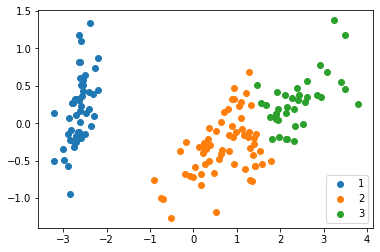

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

label = spectral_model.fit_predict(X_data)

u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X_data[label == i , 0] , X_data[label == i , 1] , label = i + 1)
plt.legend()
plt.show()

# **Заклучок од резултатите:**

Од прикажаните резултати, можеме да видиме дека со тоа што преминуваме од 2 во 3  кластери на број, има намалување на движењето.
Според графот со користењето на 2 кластери изгледот е добар, но бидејќи кластерите 2 и 3 се блиску еден до друг како вредности бројот на 3 кластери е подобар за прикажување и повеќе соодветствува на dataset-от ирис кој го користевме.